<a href="https://colab.research.google.com/github/mens0n/Jaehoon_Airline_Customer_Satisfaction_ML_Analysis.ipynb/blob/main/Jaehoon_Airline_Customer_Satisfaction_ML_Analysis_pycaret0_927.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datawig
!pip install pycaret

  Using cached scikit_learn-0.22.1-cp37-cp37m-manylinux1_x86_64.whl (7.0 MB)
  Using cached numpy-1.14.6-cp37-cp37m-manylinux1_x86_64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.14.6 which is incompatible.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.14.6 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 whic

In [1]:
from google.colab import files
uploaded_train = files.upload()

Saving train.csv to train (4).csv


In [2]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test (4).csv


In [46]:
from google.colab import files
uploaded_sub = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc

# EDA

In [47]:
submission = pd.read_csv("sample_submission.csv")

In [4]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

df_train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
Gender,Female,Female,Male,Female,Female,Female,Female,Male,Female,Male,Male,Female,Female,Female,Male,Female,Female,Female,Female,Male,Male,Male,Female,Male,Male,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Female,Male,Male,Female,Female,...,Male,Male,Female,Male,Male,Female,Male,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male,Male,Female,Female,Male,Male,Male,Female,Male,Female,Female,Female,Female
Customer Type,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,disloyal Customer,Loyal Customer
Age,22,37,46,24,58,42,20,38,51,8,40,32,45,51,23,63,70,39,41,26,7,57,52,41,60,41,16,40,18,33,24,27,66,20,29,29,21,36,58,7,...,33,25,48,41,41,40,31,23,68,37,36,35,42,24,34,29,44,10,23,31,20,36,8,26,57,39,45,61,32,42,11,57,29,38,59,30,24,22,33,42
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,...,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Personal Travel,Business travel,Personal Travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Business,Eco,Busi

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
id                                   3000 non-null int64
Gender                               3000 non-null object
Customer Type                        3000 non-null object
Age                                  3000 non-null int64
Type of Travel                       3000 non-null object
Class                                3000 non-null object
Flight Distance                      3000 non-null int64
Seat comfort                         3000 non-null int64
Departure/Arrival time convenient    3000 non-null int64
Food and drink                       3000 non-null int64
Gate location                        3000 non-null int64
Inflight wifi service                3000 non-null int64
Inflight entertainment               3000 non-null int64
Online support                       3000 non-null int64
Ease of Online booking               3000 non-null int64
On-board service                  

In [6]:
df_train.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [7]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [8]:
# id 는 제외하고 분석합니다.
df_train = df_train.drop('id', axis=1)
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.

# Visualization

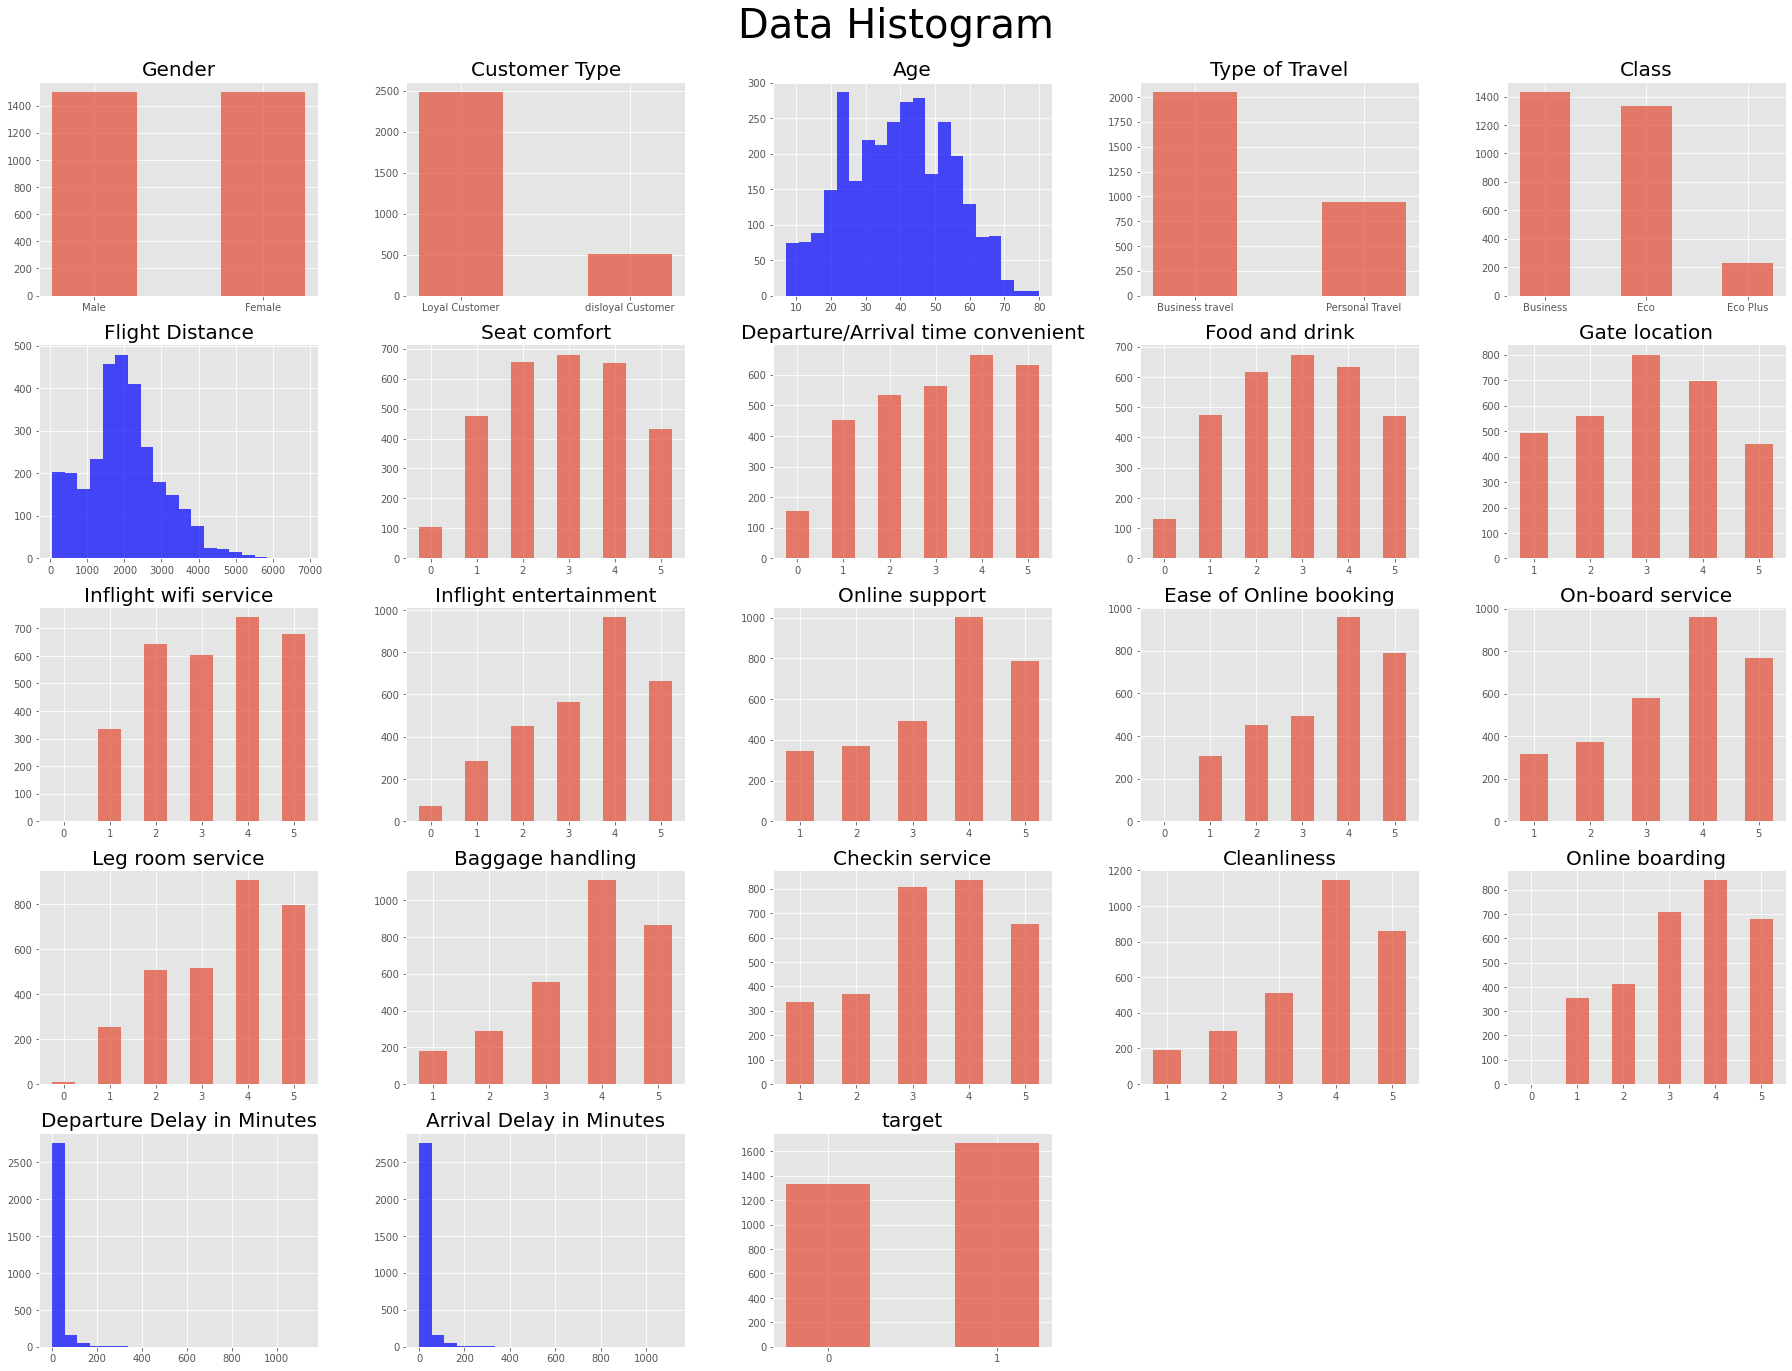

In [9]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = df_train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(df_train[cols[i]].unique()) > 20:
        plt.hist(df_train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = df_train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- sex은 비율은 비슷합니다
- age는 정규 분포 형태를 이루는 것으로 보입니다
- age를 제외한 연속형 변수들이 왼쪽으로 치우쳐져 있다는 것이 눈에 띕니다. (한쪽으로 치우쳐져 있으면 학습과정에 큰 영향을 끼칠 것이 우려되 scaling이 필요한 것으로 보입니다.)
- target은 약간의 차이가 있지만 심각한 imbalance는 아닌 듯 보입니다

In [10]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [11]:
# log변환을 이용하여 치우쳐진 정도(skewness)를 줄이도록 합니다
for xstr in numeric_feature:
    print(xstr, "Scew :", df_train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 9.190139679910239
Arrival Delay in Minutes Scew : 8.887761727831762


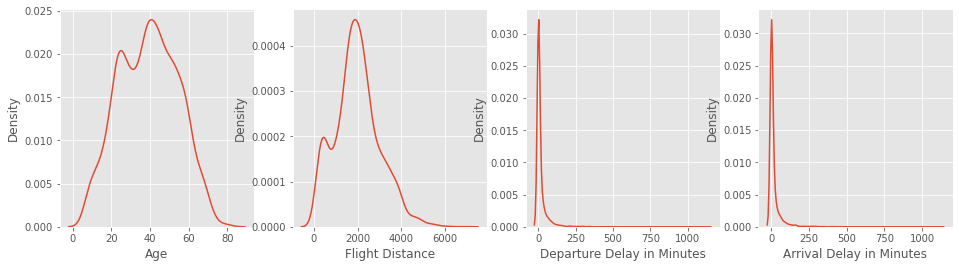

In [12]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data = df_train, ax = ax[xint])

In [13]:
#log 변환 실행

df_train['Departure Delay in Minutes'] = np.log1p(df_train['Departure Delay in Minutes'])
df_train['Arrival Delay in Minutes'] = np.log1p(df_train['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행

df_test['Departure Delay in Minutes'] = np.log1p(df_test['Departure Delay in Minutes'])
df_test['Arrival Delay in Minutes'] = np.log1p(df_test['Arrival Delay in Minutes'])

In [14]:
for xstr in numeric_feature:
    print(xstr, "Scew :", df_train[xstr].skew())
    # 모든 skew가 1 이하로 내려갔습니다

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 0.9302111175258293
Arrival Delay in Minutes Scew : 0.8979015577156512


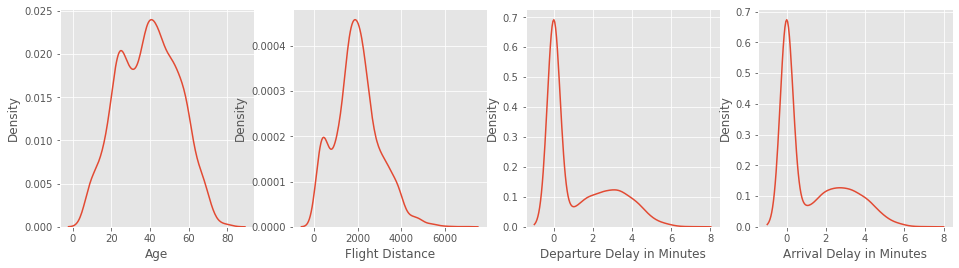

In [15]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data = df_train, ax = ax[xint])


## target과 feature의 관계 (violin plot)

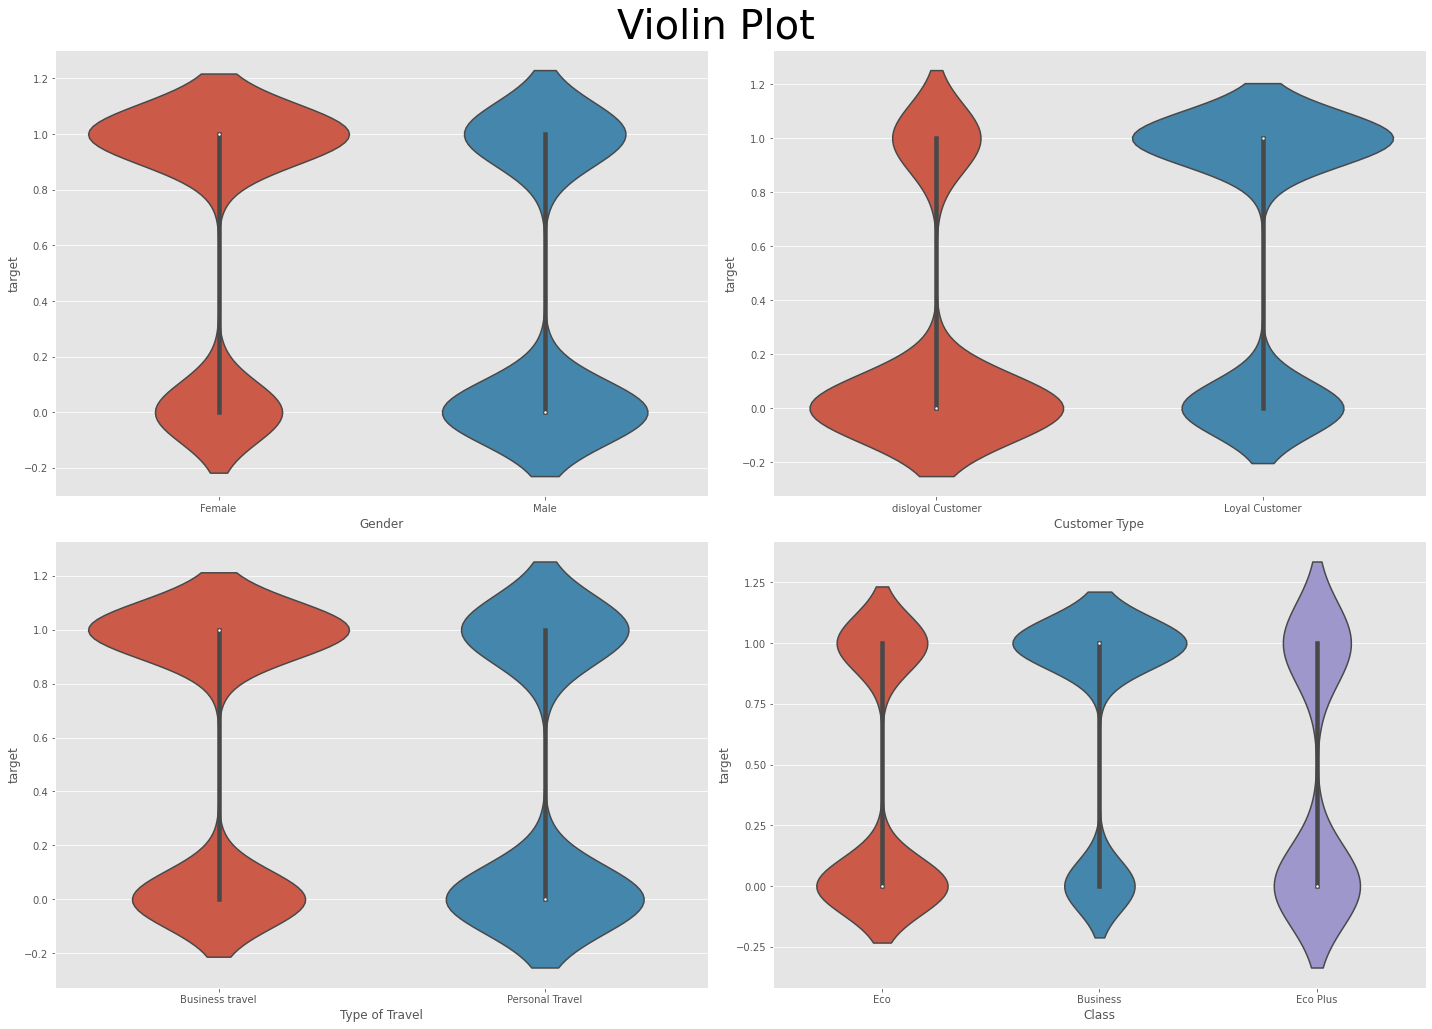

In [16]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = df_train.columns[df_train.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= df_train[categorical_feature[i]], y= df_train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Customer Type 변수에서 disloyal인지 Loyal인지에 따라 만족도(target)이 상당히 차이가 나는 것을 확인할 수 있습니다.(그래서 해당변수는 예측에 있어 중요한 변수라고 볼 수 있습니다.)
- Gender에서도 Female와 Male인지에 따라 어느정도 만족도 차이가 있는것을 확인할 수 있습니다.

In [17]:
# 수치형 데이터 분리
numeric_feature = df_train.columns[(df_train.dtypes=='int64') | (df_train.dtypes=='float')]
num_data = df_train[numeric_feature]
num_data

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,22,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0.000000,0.000000,0
1,37,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,2.944439,2.944439,0
2,46,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0.000000,0.000000,1
3,24,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,2.397895,1.098612,0
4,58,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,30,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,5.356586,5.420535,0
2996,24,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,3.044522,2.639057,0
2997,22,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,4.174387,4.219508,0
2998,33,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0.000000,1.386294,0


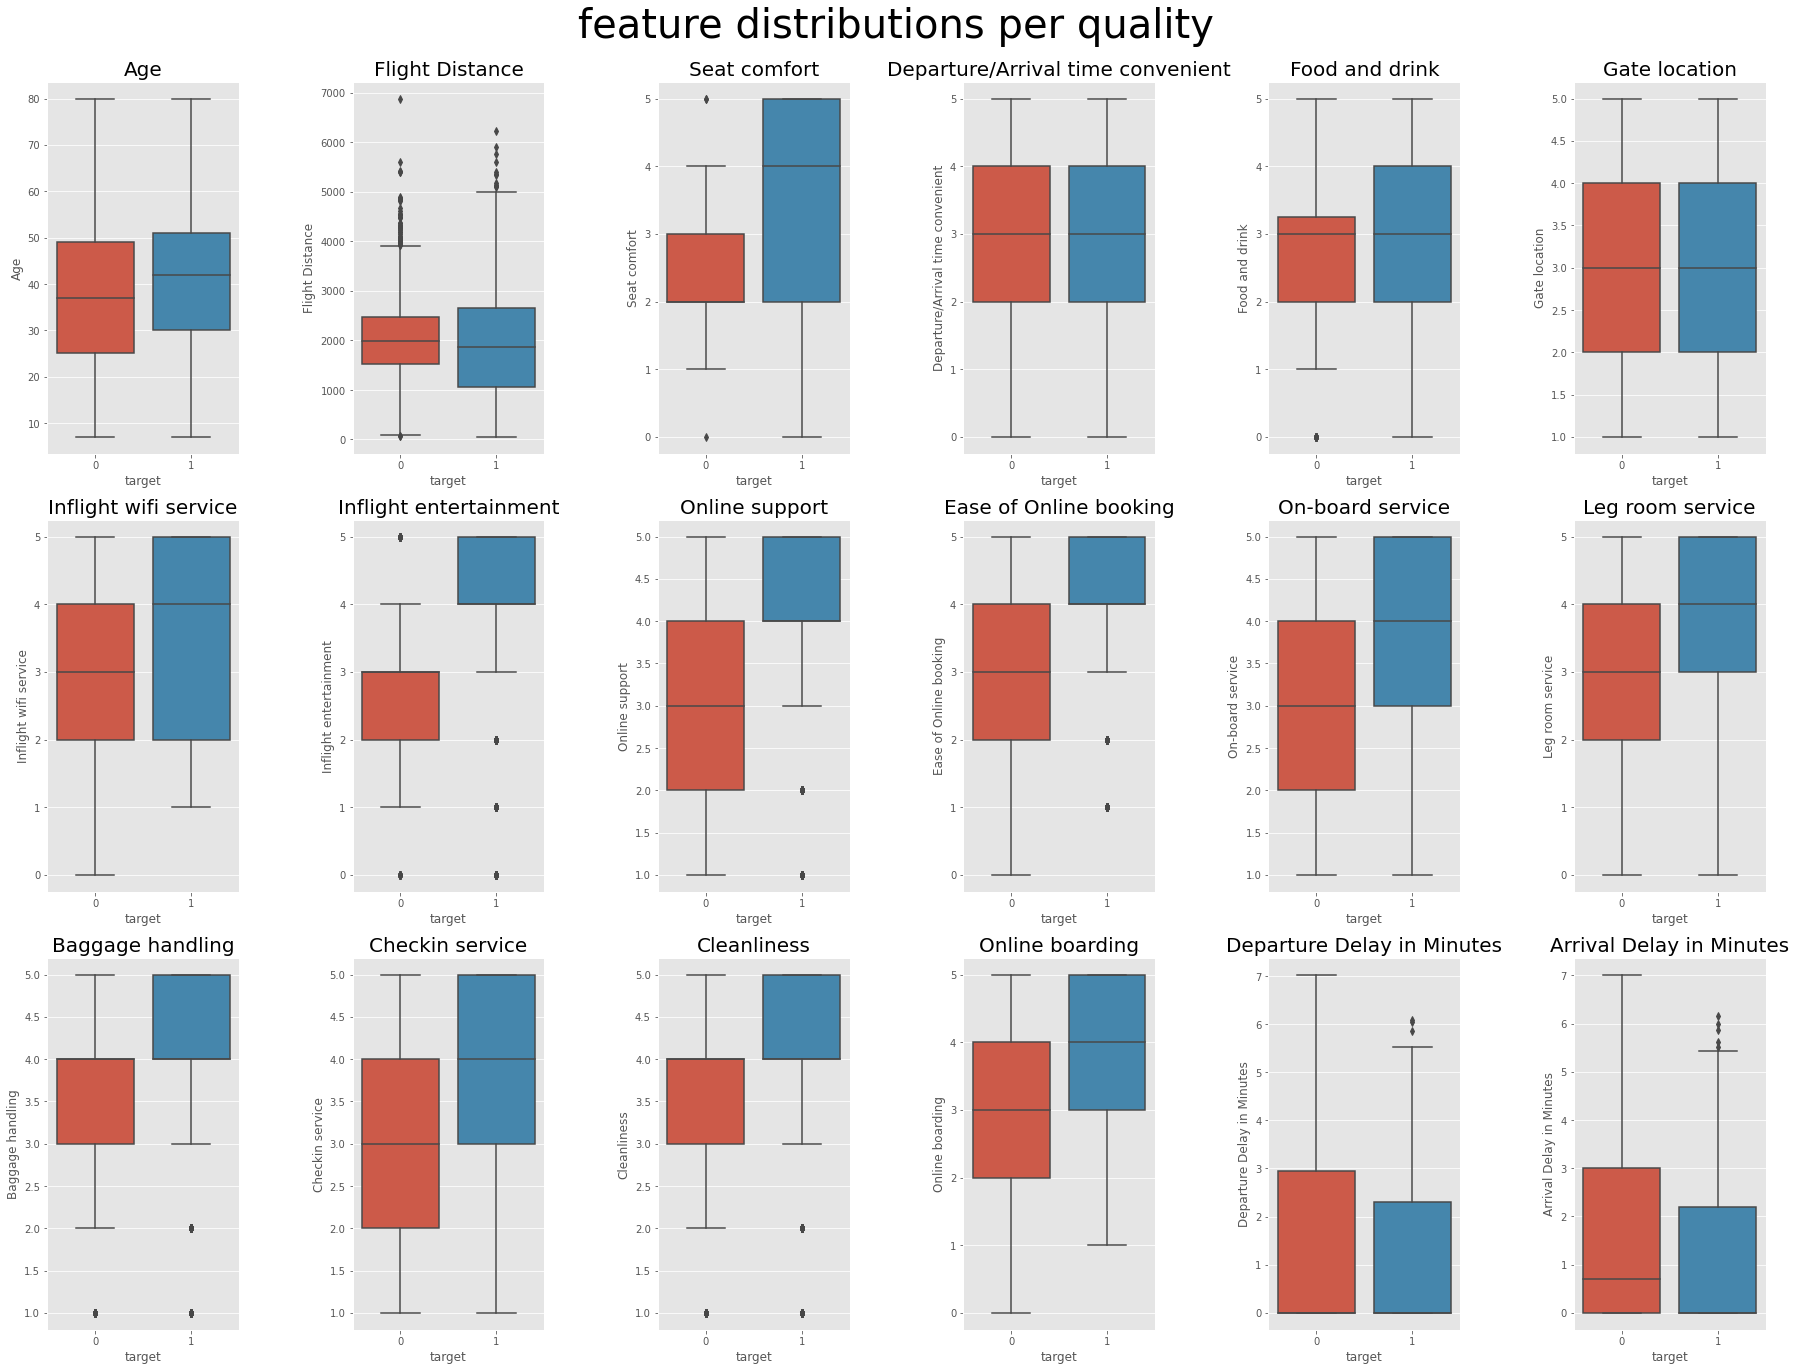

In [18]:
# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- box plot을 보니 age, Departure/Arrive time convenient, gate location과 같은 변수는 target에 영향이 없는 듯합니다

## 상관관계 시각화

In [19]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder
corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

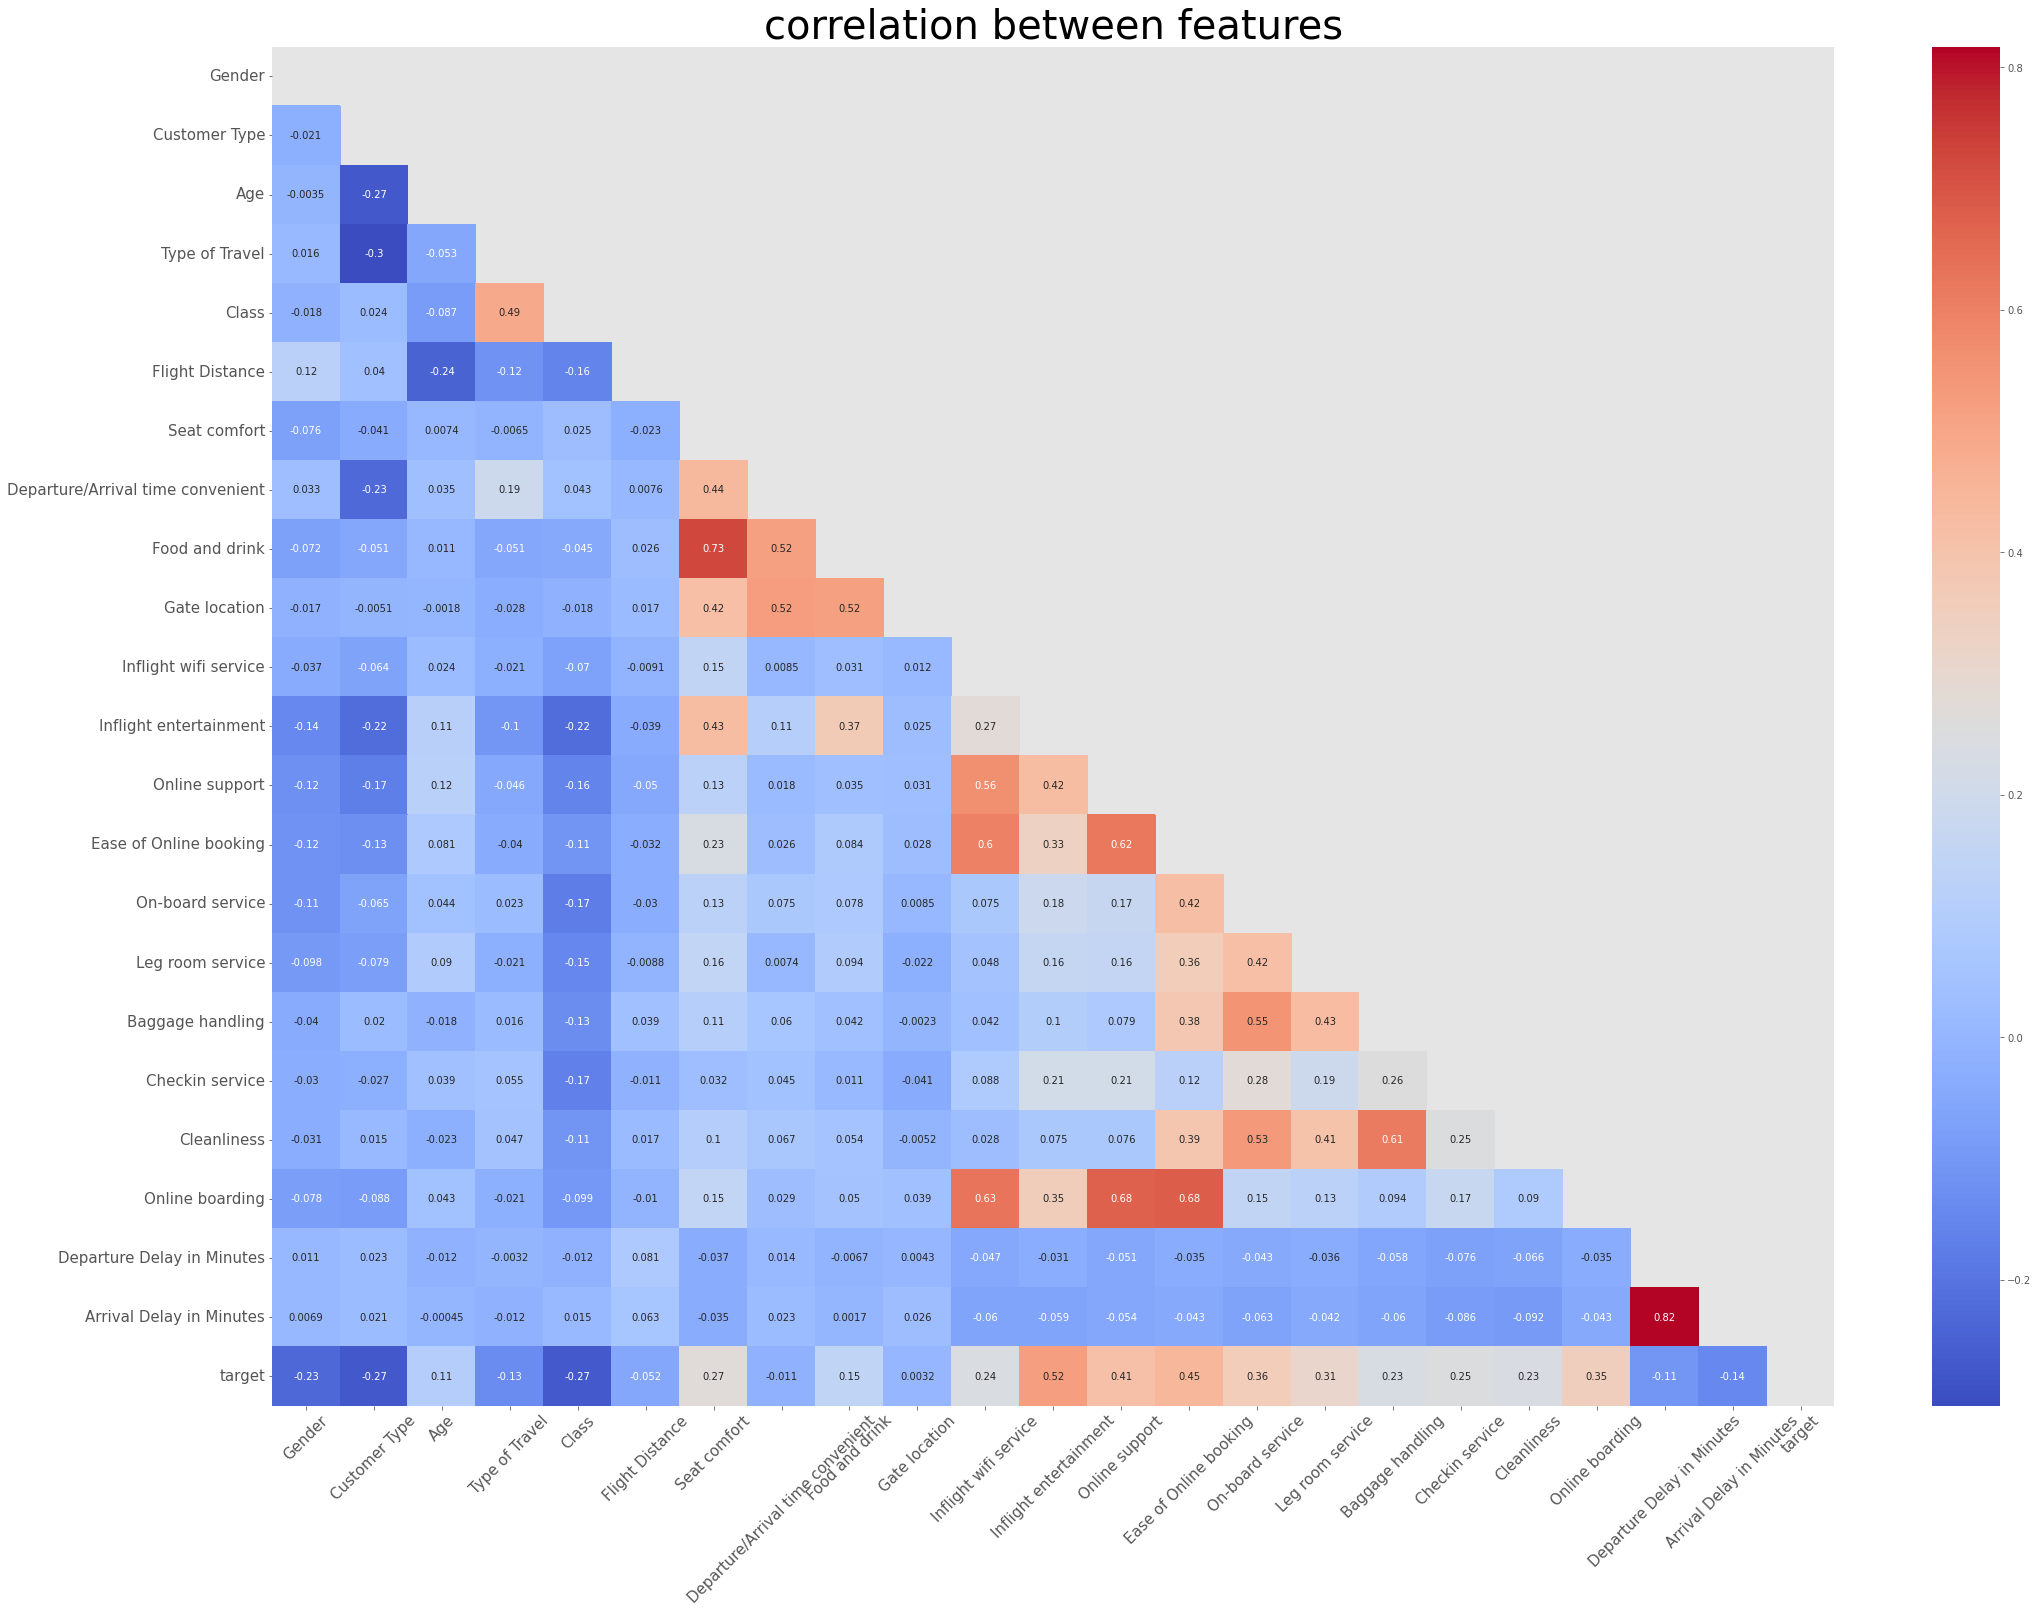

In [20]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- 고객 만족도인 target은 Inflight entertainment와 가장 높은 상관(0.52)을 보입니다
- 그외에도 Online Support, Ease of Online booking, On-board service와도 높은 상관을 보입니다.
- Departure/Arrive Delay in Minutes는 서로 과한 상관관계가 보입니다. 전체적으로 큰 영향은 없지만 작지 않다고 생각해 두 값을 합치는 방향으로 선택합니다

In [21]:
df_train['total_Delay'] = df_train[['Departure Delay in Minutes','Arrival Delay in Minutes']].sum(axis=1)
df_test['total_Delay'] = df_test[['Departure Delay in Minutes','Arrival Delay in Minutes']].sum(axis=1)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target,total_Delay
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0.000000,0.000000,0,0.000000
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,2.944439,2.944439,0,5.888878
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0.000000,0.000000,1,0.000000
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,2.397895,1.098612,0,3.496508
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0.000000,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,5.356586,5.420535,0,10.777121
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,3.044522,2.639057,0,5.683580
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,4.174387,4.219508,0,8.393895
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0.000000,1.386294,0,1.386294


# feature / target 관계 파악

In [22]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'total_Delay']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

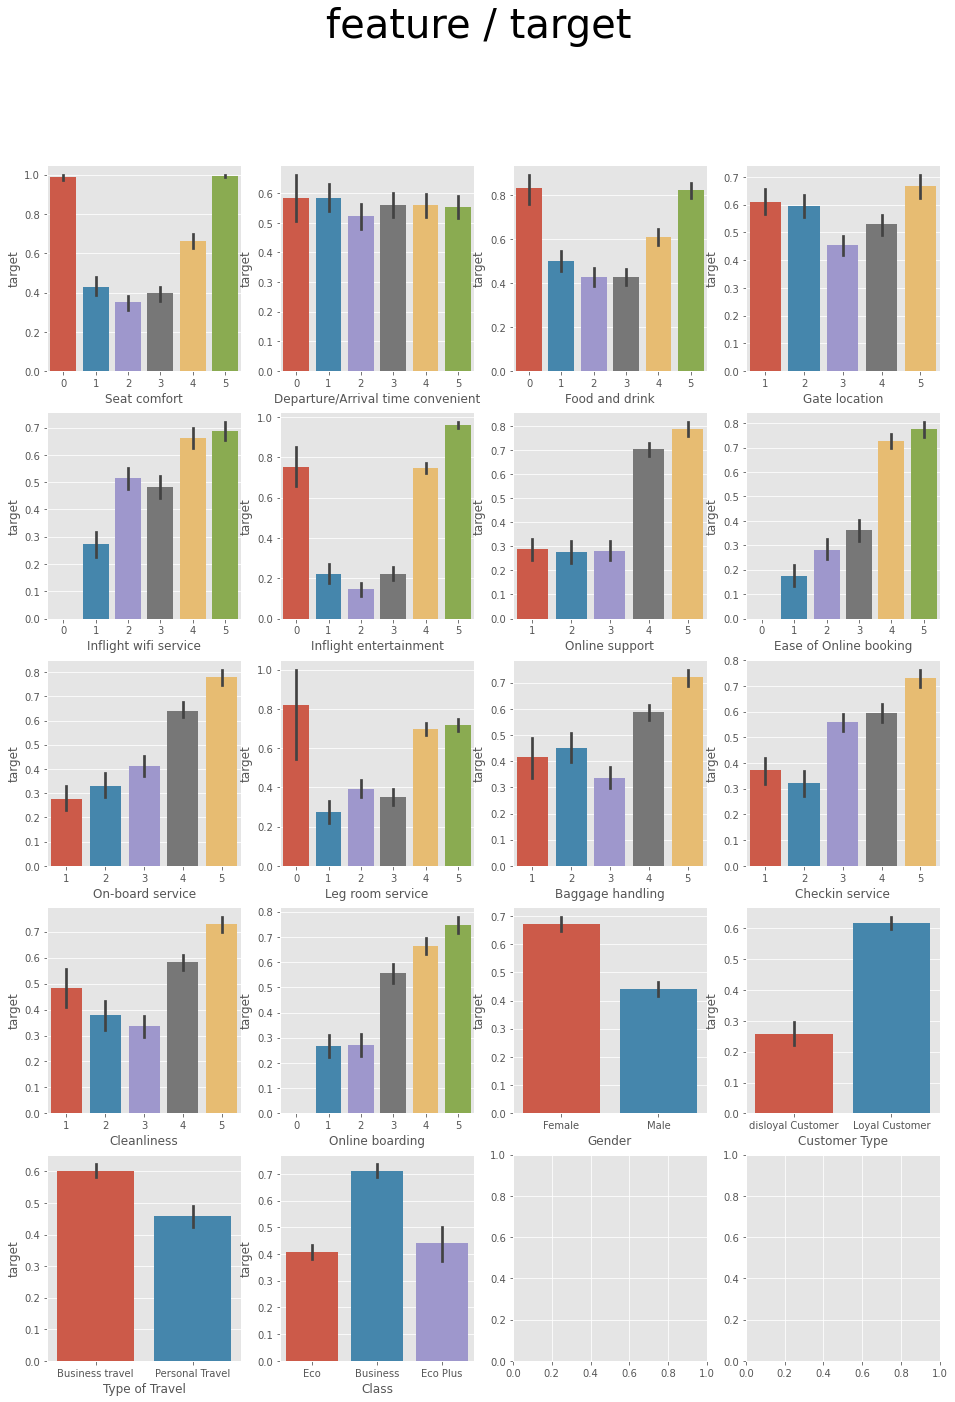

In [23]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_feature + categorical_feature

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = df_train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

### ordinal feature의 0과 target의 관계를 주목해 본다
- 만족도의 범위를 0~5인지, 1~5인지에 따라 0의 의미가 달라지기 때문에 꼭 확인하고 넘어가야 하는 값이다.
- 0포함시 : 0도 만족도의 정도를 표현하는 것 이라고 판단
- 0 미포함시 : 0은 설문 참여하지 않았다고 판다
- 결론 : odinal feature에서 0과 5가 동시에 target이 1이 높은 값을 나타내는 것은 모순이라고 판단하여 0은 설문에 참여하지 않은 것이라고 생각한다.

## 0값 처리

In [24]:
print("Train data missing value")
for feature in ordinal_feature:
    if len(df_train[df_train[feature] == 0]) > 0:
        print(feature, len(df_train[df_train[feature] == 0]))

print("=======================")
        
print("Test data missing value")
for feature in ordinal_feature:
    if len(df_test[df_test[feature] == 0]) > 0:
        print(feature, len(df_test[df_test[feature] == 0]))

Train data missing value
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1
Test data missing value
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10


In [25]:
# 상관관계를 확인하고 어떻게 처리할지 고려
corr_matrix = df_train.corr()
corr_matrix["Online boarding"].sort_values(ascending=False)[:5]

Online boarding           1.000000
Ease of Online booking    0.684511
Online support            0.675139
Inflight wifi service     0.632049
Inflight entertainment    0.353772
Name: Online boarding, dtype: float64

## datawig로 0값 처리

In [26]:
for i in range(len(df_train)):
    for feature in ordinal_feature:
        if df_train[feature].iloc[i] == 0:
            df_train[feature].iloc[i] = np.nan

for i in range(len(df_test)):
    for feature in ordinal_feature:
        if df_test[feature].iloc[i] == 0:
            df_test[feature].iloc[i] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
corr_matrix = df_train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]
# 상관관계가 높은 3개의 feature를 선정하고 datawig를 이용하여 학습시킨뒤 train과 test셋의 결측치를 대치합니다.

Inflight wifi service     1.000000
Online boarding           0.630754
Ease of Online booking    0.602117
Online support            0.562900
Inflight entertainment    0.290907
Name: Inflight wifi service, dtype: float64

In [28]:
import datawig

target_feature = "Inflight wifi service"

imputer = datawig.SimpleImputer(input_columns=['Online boarding', 'Ease of Online booking', 'Online support'],
                                output_column=target_feature)
imputer.fit(train_df=df_train, num_epochs=50)

null_train = df_train[df_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df_train)):
    if np.isnan(df_train[target_feature].iloc[i]) == True:
        df_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = df_test[df_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df_test)):
    if np.isnan(df_test[target_feature].iloc[i]) == True:
        df_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

2022-02-17 09:21:07,820 [INFO]  
========== start: fit model
2022-02-17 09:21:07,823 [WARNING]  Already bound, ignoring bind()
2022-02-17 09:21:08,032 [INFO]  Epoch[0] Batch [0-85]	Speed: 7217.17 samples/sec	cross-entropy=10.386827	Inflight wifi service-accuracy=0.000000
2022-02-17 09:21:08,221 [INFO]  Epoch[0] Train-cross-entropy=9.292093
2022-02-17 09:21:08,224 [INFO]  Epoch[0] Train-Inflight wifi service-accuracy=0.000000
2022-02-17 09:21:08,226 [INFO]  Epoch[0] Time cost=0.391
2022-02-17 09:21:08,233 [INFO]  Saved checkpoint to "inflight_wifi_service/model-0000.params"
2022-02-17 09:21:08,254 [INFO]  Epoch[0] Validation-cross-entropy=10.364917
2022-02-17 09:21:08,257 [INFO]  Epoch[0] Validation-Inflight wifi service-accuracy=0.000000
2022-02-17 09:21:08,462 [INFO]  Epoch[1] Batch [0-85]	Speed: 7035.04 samples/sec	cross-entropy=8.678793	Inflight wifi service-accuracy=0.000000
2022-02-17 09:21:08,665 [INFO]  Epoch[1] Train-cross-entropy=8.330823
2022-02-17 09:21:08,668 [INFO]  Epoch[

In [29]:
# 상관관계가 높은 3개의 feature를 선정하고 datawig를 이용하여 학습시킨뒤 train과 test셋의 결측치를 대치합니다.
corr_matrix = df_train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630521
Ease of Online booking    0.602072
Online support            0.562687
Inflight entertainment    0.290797
Name: Inflight wifi service, dtype: float64

In [30]:
import datawig

target_feature = "Leg room service"

imputer = datawig.SimpleImputer(input_columns=['Baggage handling', 'On-board service', 'Cleanliness'],
                                output_column=target_feature)
imputer.fit(train_df=df_train, num_epochs=50)

null_train = df_train[df_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df_train)):
    if np.isnan(df_train[target_feature].iloc[i]) == True:
        df_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = df_test[df_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(df_test)):
    if np.isnan(df_test[target_feature].iloc[i]) == True:
        df_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
for feature in ordinal_feature:
    if df_train[feature].isnull().sum() > 0:
        print(feature, df_train[feature].isnull().sum())
print("================")
for feature in ordinal_feature:
    if df_test[feature].isnull().sum() > 0:
        print(feature, df_test[feature].isnull().sum())

Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight entertainment 73
Ease of Online booking 1
Online boarding 1
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight entertainment 39


# 결측치 확인

In [32]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df_train)

결측치가 있는 컬럼은: Seat comfort 입니다
해당 컬럼에 총 106 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Departure/Arrival time convenient 입니다
해당 컬럼에 총 154 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Food and drink 입니다
해당 컬럼에 총 129 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Inflight entertainment 입니다
해당 컬럼에 총 73 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Ease of Online booking 입니다
해당 컬럼에 총 1 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Online boarding 입니다
해당 컬럼에 총 1 개의 결측치가 존재합니다.


In [33]:
train_x = df_train.drop(["target", "Departure Delay in Minutes", "Arrival Delay in Minutes"],axis=1)
test_x = df_test.drop(["Departure Delay in Minutes", "Arrival Delay in Minutes"],axis=1)
train_y = df_train.target 

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train_x) # train 사용해 label map 생성
train_x = label_encoder(train_x, label_map) # train 라벨 인코딩

train_x.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,total_Delay
0,1,1,22,1,1,1599,3.0,NaN,3.0,3,4.0,3.0,4,4.0,5,4.0,4,4,5,4.0,0.000000
1,1,2,37,1,2,2810,2.0,4.0,4.0,4,1.0,4.0,3,5.0,5,4.0,2,1,5,2.0,5.888878
2,2,2,46,1,2,2622,1.0,1.0,1.0,1,4.0,5.0,5,4.0,4,4.0,4,5,4,3.0,0.000000
3,1,1,24,1,1,2348,3.0,3.0,3.0,3,3.0,3.0,3,3.0,2,4.0,5,3,4,3.0,3.496508
4,1,2,58,1,2,105,3.0,3.0,3.0,3,4.0,4.0,5,4.0,4,4.0,4,4,4,5.0,0.000000


In [34]:
label_map = make_label_map(test_x) # train 사용해 label map 생성
test_x = label_encoder(test_x, label_map) # train 라벨 인코딩

test_x.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,total_Delay
0,1,1,1,61,1,1,2037,1.0,1.0,1.0,1,3.0,5.0,5,5,5,5.0,5,3,5,3,8.028781
1,2,1,2,27,2,2,1846,1.0,1.0,1.0,4,1.0,1.0,1,1,3,4.0,5,4,4,1,0.000000
2,3,1,1,52,2,2,1622,4.0,4.0,4.0,4,4.0,3.0,4,5,5,5.0,5,4,5,3,0.000000
3,4,2,1,54,2,2,3534,4.0,4.0,4.0,4,5.0,4.0,5,2,2,2.0,2,5,2,1,0.000000
4,5,1,1,41,2,1,1471,4.0,3.0,3.0,3,4.0,4.0,4,4,3,1.0,2,5,4,4,0.000000


In [35]:
print(df_test.info(), df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
id                                   2000 non-null int64
Gender                               2000 non-null object
Customer Type                        2000 non-null object
Age                                  2000 non-null int64
Type of Travel                       2000 non-null object
Class                                2000 non-null object
Flight Distance                      2000 non-null int64
Seat comfort                         1936 non-null float64
Departure/Arrival time convenient    1910 non-null float64
Food and drink                       1920 non-null float64
Gate location                        2000 non-null int64
Inflight wifi service                2000 non-null float64
Inflight entertainment               1961 non-null float64
Online support                       2000 non-null int64
Ease of Online booking               2000 non-null int64
On-board service        

In [36]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age','Flight Distance','total_Delay']

scaler = StandardScaler()
train_x[num_features] = scaler.fit_transform(train_x[num_features]) 
test_x[num_features] = scaler.fit_transform(test_x[num_features])
train_x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,total_Delay
0,1,1,-1.138798,1,1,-0.373641,3.0,NaN,3.0,3,4.0,3.0,4,4.0,5,4.0,4,4,5,4.0,-0.806458
1,1,2,-0.145833,1,2,0.804446,2.0,4.0,4.0,4,1.0,4.0,3,5.0,5,4.0,2,1,5,2.0,1.085347
2,2,2,0.449945,1,2,0.621556,1.0,1.0,1.0,1,4.0,5.0,5,4.0,4,4.0,4,5,4,3.0,-0.806458
3,1,1,-1.006402,1,1,0.355003,3.0,3.0,3.0,3,3.0,3.0,3,3.0,2,4.0,5,3,4,3.0,0.316797
4,1,2,1.244317,1,2,-1.827036,3.0,3.0,3.0,3,4.0,4.0,5,4.0,4,4.0,4,4,4,5.0,-0.806458


# 모델 학습
빠르게 다양한 결과를 시도해보기 위해 pycaret을 사용하여 모델을 선정하고 학습했습니다.

In [39]:
from pycaret.classification import *
clf1 = setup(data = df_train,
             silent = True,
             target = 'target',
             session_id = 1234,
             n_jobs = 7)

,Description,Value
0,session_id,1234
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 24)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
best = compare_models(n_select=3, fold = 10) #상위 모델 3개를 선택합니다

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9300,0.9818,0.9299,0.9443,0.9368,0.8583,0.8588,0.811
gbc,Gradient Boosting Classifier,0.9209,0.9736,0.9265,0.9320,0.9288,0.8399,0.8408,0.608
et,Extra Trees Classifier,0.9162,0.9773,0.9188,0.9304,0.9243,0.8303,0.8310,0.430
rf,Random Forest Classifier,0.9085,0.9743,0.9077,0.9271,0.9170,0.8152,0.8161,0.463
lr,Logistic Regression,0.8928,0.9614,0.9026,0.9057,0.9038,0.7828,0.7836,2.071
lda,Linear Discriminant Analysis,0.8909,0.9602,0.8974,0.9065,0.9015,0.7792,0.7802,0.067
ridge,Ridge Classifier,0.8895,0.0000,0.8974,0.9042,0.9004,0.7763,0.7772,0.034
ada,Ada Boost Classifier,0.8871,0.9568,0.8863,0.9094,0.8974,0.7719,0.7728,0.262
dt,Decision Tree Classifier,0.8780,0.8755,0.8974,0.8862,0.8914,0.7523,0.7533,0.052
nb,Naive Bayes,0.8514,0.9277,0.8188,0.9059,0.8598,0.7025,0.7070,0.034


In [41]:
blend_3_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_3_soft).head(10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.9854,0.9316,0.9237,0.9277,0.8358,0.8358
1,0.9333,0.9777,0.9231,0.9558,0.9391,0.8655,0.8661
2,0.9286,0.9811,0.9231,0.9474,0.9351,0.8557,0.8561
3,0.9095,0.9835,0.9316,0.9083,0.9198,0.8160,0.8164
4,0.9381,0.9791,0.9145,0.9727,0.9427,0.8755,0.8775
5,0.9286,0.9756,0.9145,0.9554,0.9345,0.8560,0.8570
6,0.9333,0.9817,0.9316,0.9478,0.9397,0.8652,0.8654
7,0.9238,0.9802,0.9402,0.9244,0.9322,0.8453,0.8454
8,0.9095,0.9780,0.9316,0.9083,0.9198,0.8160,0.8164
9,0.9426,0.9865,0.9487,0.9487,0.9487,0.8835,0.8835


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9223,0.9831,0.9317,0.928,0.9299,0.8428,0.8428


,Age,Flight Distance,Inflight wifi service,Leg room service,Departure Delay in Minutes,Arrival Delay in Minutes,total_Delay,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_1.0,Seat comfort_2.0,Seat comfort_3.0,Seat comfort_4.0,Seat comfort_5.0,Seat comfort_not_available,Departure/Arrival time convenient_1.0,Departure/Arrival time convenient_2.0,Departure/Arrival time convenient_3.0,Departure/Arrival time convenient_4.0,Departure/Arrival time convenient_5.0,Departure/Arrival time convenient_not_available,Food and drink_1.0,Food and drink_2.0,Food and drink_3.0,Food and drink_4.0,Food and drink_5.0,Food and drink_not_available,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Inflight entertainment_1.0,Inflight entertainment_2.0,Inflight entertainment_3.0,Inflight entertainment_4.0,...,Inflight entertainment_not_available,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,Ease of Online booking_1.0,Ease of Online booking_2.0,Ease of Online booking_3.0,Ease of Online booking_4.0,Ease of Online booking_5.0,Ease of Online booking_not_available,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1.0,Online boarding_2.0,Online boarding_3.0,Online boarding_4.0,Online boarding_5.0,target,Label,Score
0,34.0,3583.0,3.0,4.0,5.723585,5.710427,11.434012,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8524
1,29.0,3701.0,4.0,2.0,3.713572,3.637586,7.351158,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9553
2,62.0,1235.0,1.0,5.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9966
3,44.0,1902.0,5.0,3.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9999
4,44.0,459.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9552
5,40.0,1666.0,4.0,4.0,2.772589,0.000000,2.772589,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9909
6,68.0,2516.0,4.0,1.0,1.386294,2.197225,3.583519,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [43]:
final_blend_3_soft = finalize_model(blend_3_soft)
prediction = predict_model(final_blend_3_soft, data = df_test)

In [44]:
print(prediction["Label"])

0       1
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int64


In [48]:
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [49]:
submission.to_csv("flight_predict_test.csv",index=False)

In [51]:
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1
